<a href="https://colab.research.google.com/github/tanyajainC137/Titanic-Machine-Learning-from-Disaster/blob/master/titanic_model_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/My Drive/Machine Learning/kaggle titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/Machine Learning/kaggle titanic/test.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
B79            1
D10 D12        1
C148           1
E77            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [0]:
def data_clean(df):
  embark = {'S':1,'C':2,'Q':3}
  gender = { 'male': 1, 'female':0}
  df['Embarked']=df['Embarked'].map(embark)
  df['Sex']= df['Sex'].map(gender)
  df = df.dropna(subset = ['Pclass', 'Sex', 'Embarked'])
  return df
train = data_clean(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,1.362205
std,256.998173,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.000000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler

def feature_ext(df):

  feature_names =['Pclass', 'Sex','Embarked']
  features = df[feature_names]
  
  
  scaler = MinMaxScaler()
  features_scaled = scaler.fit_transform(features)
  
  return features_scaled

def target_ext(df): 
  target = df['Survived']
  target = target.values.ravel()
  return target

In [0]:
features = feature_ext(train)
features.shape

(889, 3)

In [0]:
target = target_ext(train)
target.shape

(889,)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


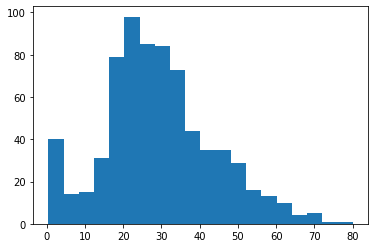

In [0]:
plt.hist(train['Age'], bins = 20)
plt.show()

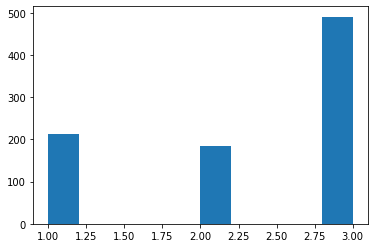

In [0]:
plt.hist(train['Pclass'])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, target,  test_size =0.20)

In [0]:
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC(random_state= 1)

clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.8202247191011236

In [0]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, features, target, cv =5 )
score.mean()

0.8110264711483527

In [0]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(n_estimators = 100, random_state= 1)

clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)


0.8202247191011236

In [0]:
score = cross_val_score(clf, features, target, cv =5 )
score.mean()

0.8110264711483527

In [0]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [0]:
test = data_clean(test)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,2
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,1


In [0]:
f = feature_ext(test)
f.shape

(418, 3)

In [0]:
y_pred = clf.predict(f)
sub = pd.DataFrame(y_pred, columns = ['Survived'])
sub['PassengerId'] = test['PassengerId']
sub = sub[['PassengerId','Survived']]
sub = sub.set_index('PassengerId')

In [0]:
sub.to_csv('final_submission.csv')